In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import subprocess
import os
import sys
from collections import defaultdict
import numpy as np
print("Stuff imported")

Stuff imported


In [8]:
executable = "./SSP.py"
cmd_template = "{} {} 0 {} -o"  # exe infile 0 sum once
perf_dir = os.path.join(os.getcwd(), "performance")
in_dir = os.path.join(perf_dir, "inputs")
ans_dir = os.path.join(perf_dir,  "answers")
in_files = os.listdir(in_dir)

In [9]:
data_point_results = defaultdict(list)

in_files_num = len(in_files)
for num, in_file in enumerate(in_files, 1):
# if False:  # just to avoid git flooding
    in_path = os.path.join(in_dir, in_file)
    ans_path = os.path.join(ans_dir, in_file)
    data_point = int(in_file.split("_")[-1])
    f = open(ans_path, "r")
    target_sum = 0
    target_len = 0
    for line in f:
        if line.startswith("Sum "):
            target_sum = int(line[:-1].split()[-1])
        elif line.startswith("Sum_len"):
            target_len = int(line[:-1].split()[-1])
        else:
            answer_lst = [int(x) for x in line[1:-2].replace(",", "").split()]
    f.close()
    cmd = "time ./SSP.py {} {}".format(in_path, target_sum)
    out = subprocess.check_output(cmd, shell=True, stderr=subprocess.STDOUT).decode("utf-8").split("\n")
    res_line__ = [l for l in out if l.startswith("[")]
    if len(res_line__) == 0:
        print("FAILED FOR {}".format(cmd))
        continue
    res_line = res_line__[0]
    result = [int(x) for x in res_line[1:-1].replace(",", "").split()]
    ans_sum = sum(result)
    if ans_sum != target_sum:
        print("{} WRONG RESULT EXPECTED {} GOT {}".format(cmd, target_sum, ans_sum))
        continue
    time_line_ = [l for l in out if l.startswith("real")][0]
    time_ = time_line_.split("\t")[1].split("m")
    m = int(time_[0])
    s = float(time_[1][:-1])
    # h, m, s = int(time_[0]) * 3600, int(time_[1]) * 60, float(time_[2])
    tottime = m + s
    print("Process {}/{} N {} Expected sum {} got {} tottime {} sec"
          "".format(num, in_files_num, data_point, target_sum, ans_sum, tottime))
    data_point_results[data_point].append(tottime)


Process 1/100 N 10000 Expected sum 19707106 got 19707106 tottime 0.259 sec
Process 2/100 N 10000 Expected sum 19782141 got 19782141 tottime 0.274 sec
Process 3/100 N 10000 Expected sum 20175952 got 20175952 tottime 0.227 sec
Process 4/100 N 10000 Expected sum 813232 got 813232 tottime 0.323 sec
Process 5/100 N 10000 Expected sum 809374 got 809374 tottime 0.27 sec
Process 6/100 N 10000 Expected sum 19829708 got 19829708 tottime 0.23 sec
Process 7/100 N 10000 Expected sum 19627781 got 19627781 tottime 0.227 sec
Process 8/100 N 10000 Expected sum 19977860 got 19977860 tottime 0.231 sec
Process 9/100 N 10000 Expected sum 810513 got 810513 tottime 0.207 sec
Process 10/100 N 10000 Expected sum 797766 got 797766 tottime 0.196 sec
Process 11/100 N 10000 Expected sum 798592 got 798592 tottime 0.193 sec
Process 12/100 N 10000 Expected sum 19560325 got 19560325 tottime 0.198 sec
Process 13/100 N 10000 Expected sum 822200 got 822200 tottime 0.186 sec
Process 14/100 N 10000 Expected sum 768486 got 

In [10]:
file_to_group = {f: f.split("_")[1] for f in in_files}
group_to_file = defaultdict(list)
C_values, N_values = [], []
for fle, grp in file_to_group.items():
    group_to_file[grp].append(fle)
for fle in group_to_file["C"]:
    path = os.path.join(in_dir, fle)
    f = open(path, "r")
    values = [int(x.rstrip()) for x in f.readlines()]
    C_values.extend(values)
for fle in group_to_file["N"]:
    path = os.path.join(in_dir, fle)
    f = open(path, "r")
    values = [int(x.rstrip()) for x in f.readlines()]
    N_values.extend(values)

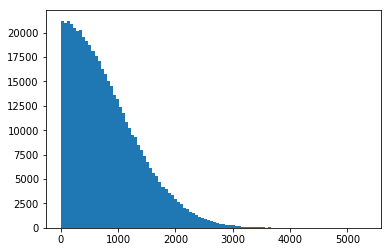

In [11]:
plt.hist(N_values, bins=100)
plt.show()

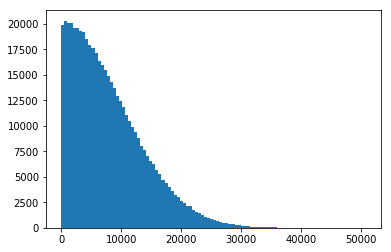

In [12]:
plt.hist(C_values, bins=100)
plt.show()